#importing essential libraries for building a machine learning model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Importing Dataset

In [ ]:
df=pd.read_csv('/content/startup data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
# dataset rows and columns
df.shape

(923, 49)

In [ ]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 6', 'id', 'zip_code', 'object_id', 'state_code.1', 'status', 'name',  'city', 'latitude',
         'longitude', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
         'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
         'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'], axis = 1, inplace = True)

In [ ]:
df.shape

(923, 19)

In [ ]:
#To check missing values
df.isna().sum()

state_code                    0
labels                        0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
dtype: int64

In [ ]:
df.dropna(subset=['age_first_milestone_year', 'age_last_milestone_year'], inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500


In [ ]:
df.describe()

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.712987,2.018248,3.818604,3.055706,4.755399,8.540260,2.372727,2.647875e+07,2.205195,0.314286,0.276623,0.542857,0.410390,0.228571,0.102597,2.849587,0.828571
std,0.452662,2.297679,2.880418,2.978976,3.214081,7.402355,1.383550,2.072467e+08,1.137823,0.464533,0.447619,0.498484,0.492224,0.420185,0.303630,1.896506,0.377128
min,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.496575,1.639725,1.000000,2.397300,4.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,1.000000,1.309600,3.320550,2.519150,4.482200,6.000000,2.000000,1.000000e+07,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,1.000000,3.016425,5.363700,4.688350,6.753400,11.000000,3.000000,2.450000e+07,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000
max,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,8.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


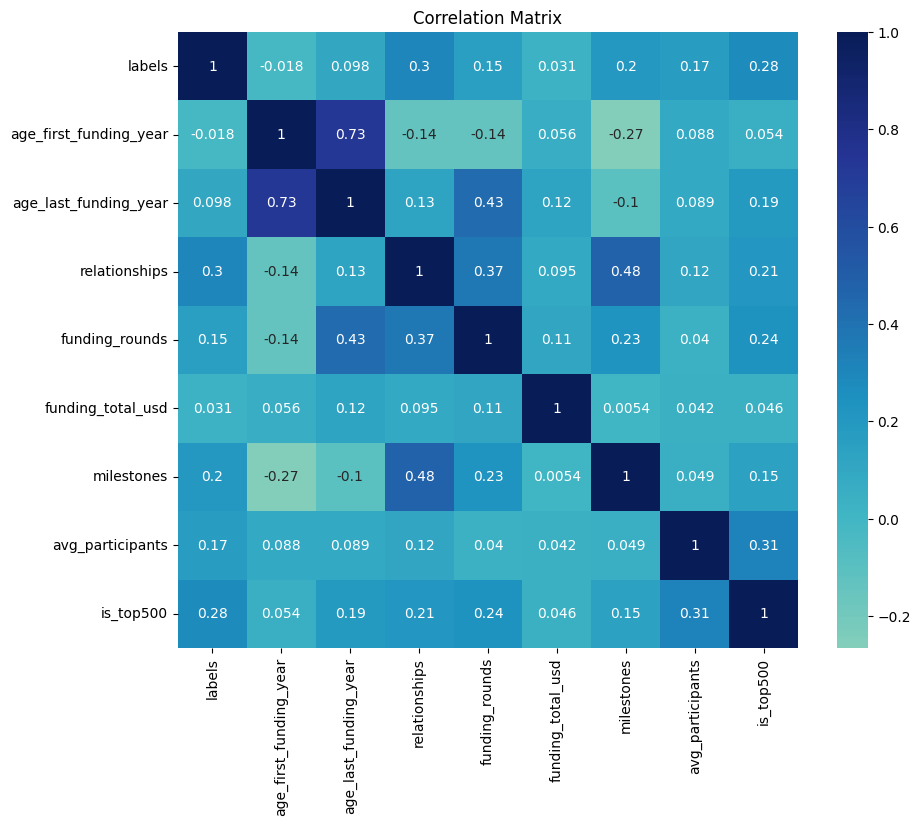

In [ ]:
columns = [
    'labels','age_first_funding_year','age_last_funding_year','relationships',
    'funding_rounds','funding_total_usd','milestones','avg_participants','is_top500'
]

subset_df = df[columns]

cor_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(cor_matrix, annot=True, cmap='YlGnBu', center=0)

plt.title('Correlation Matrix')
plt.show()

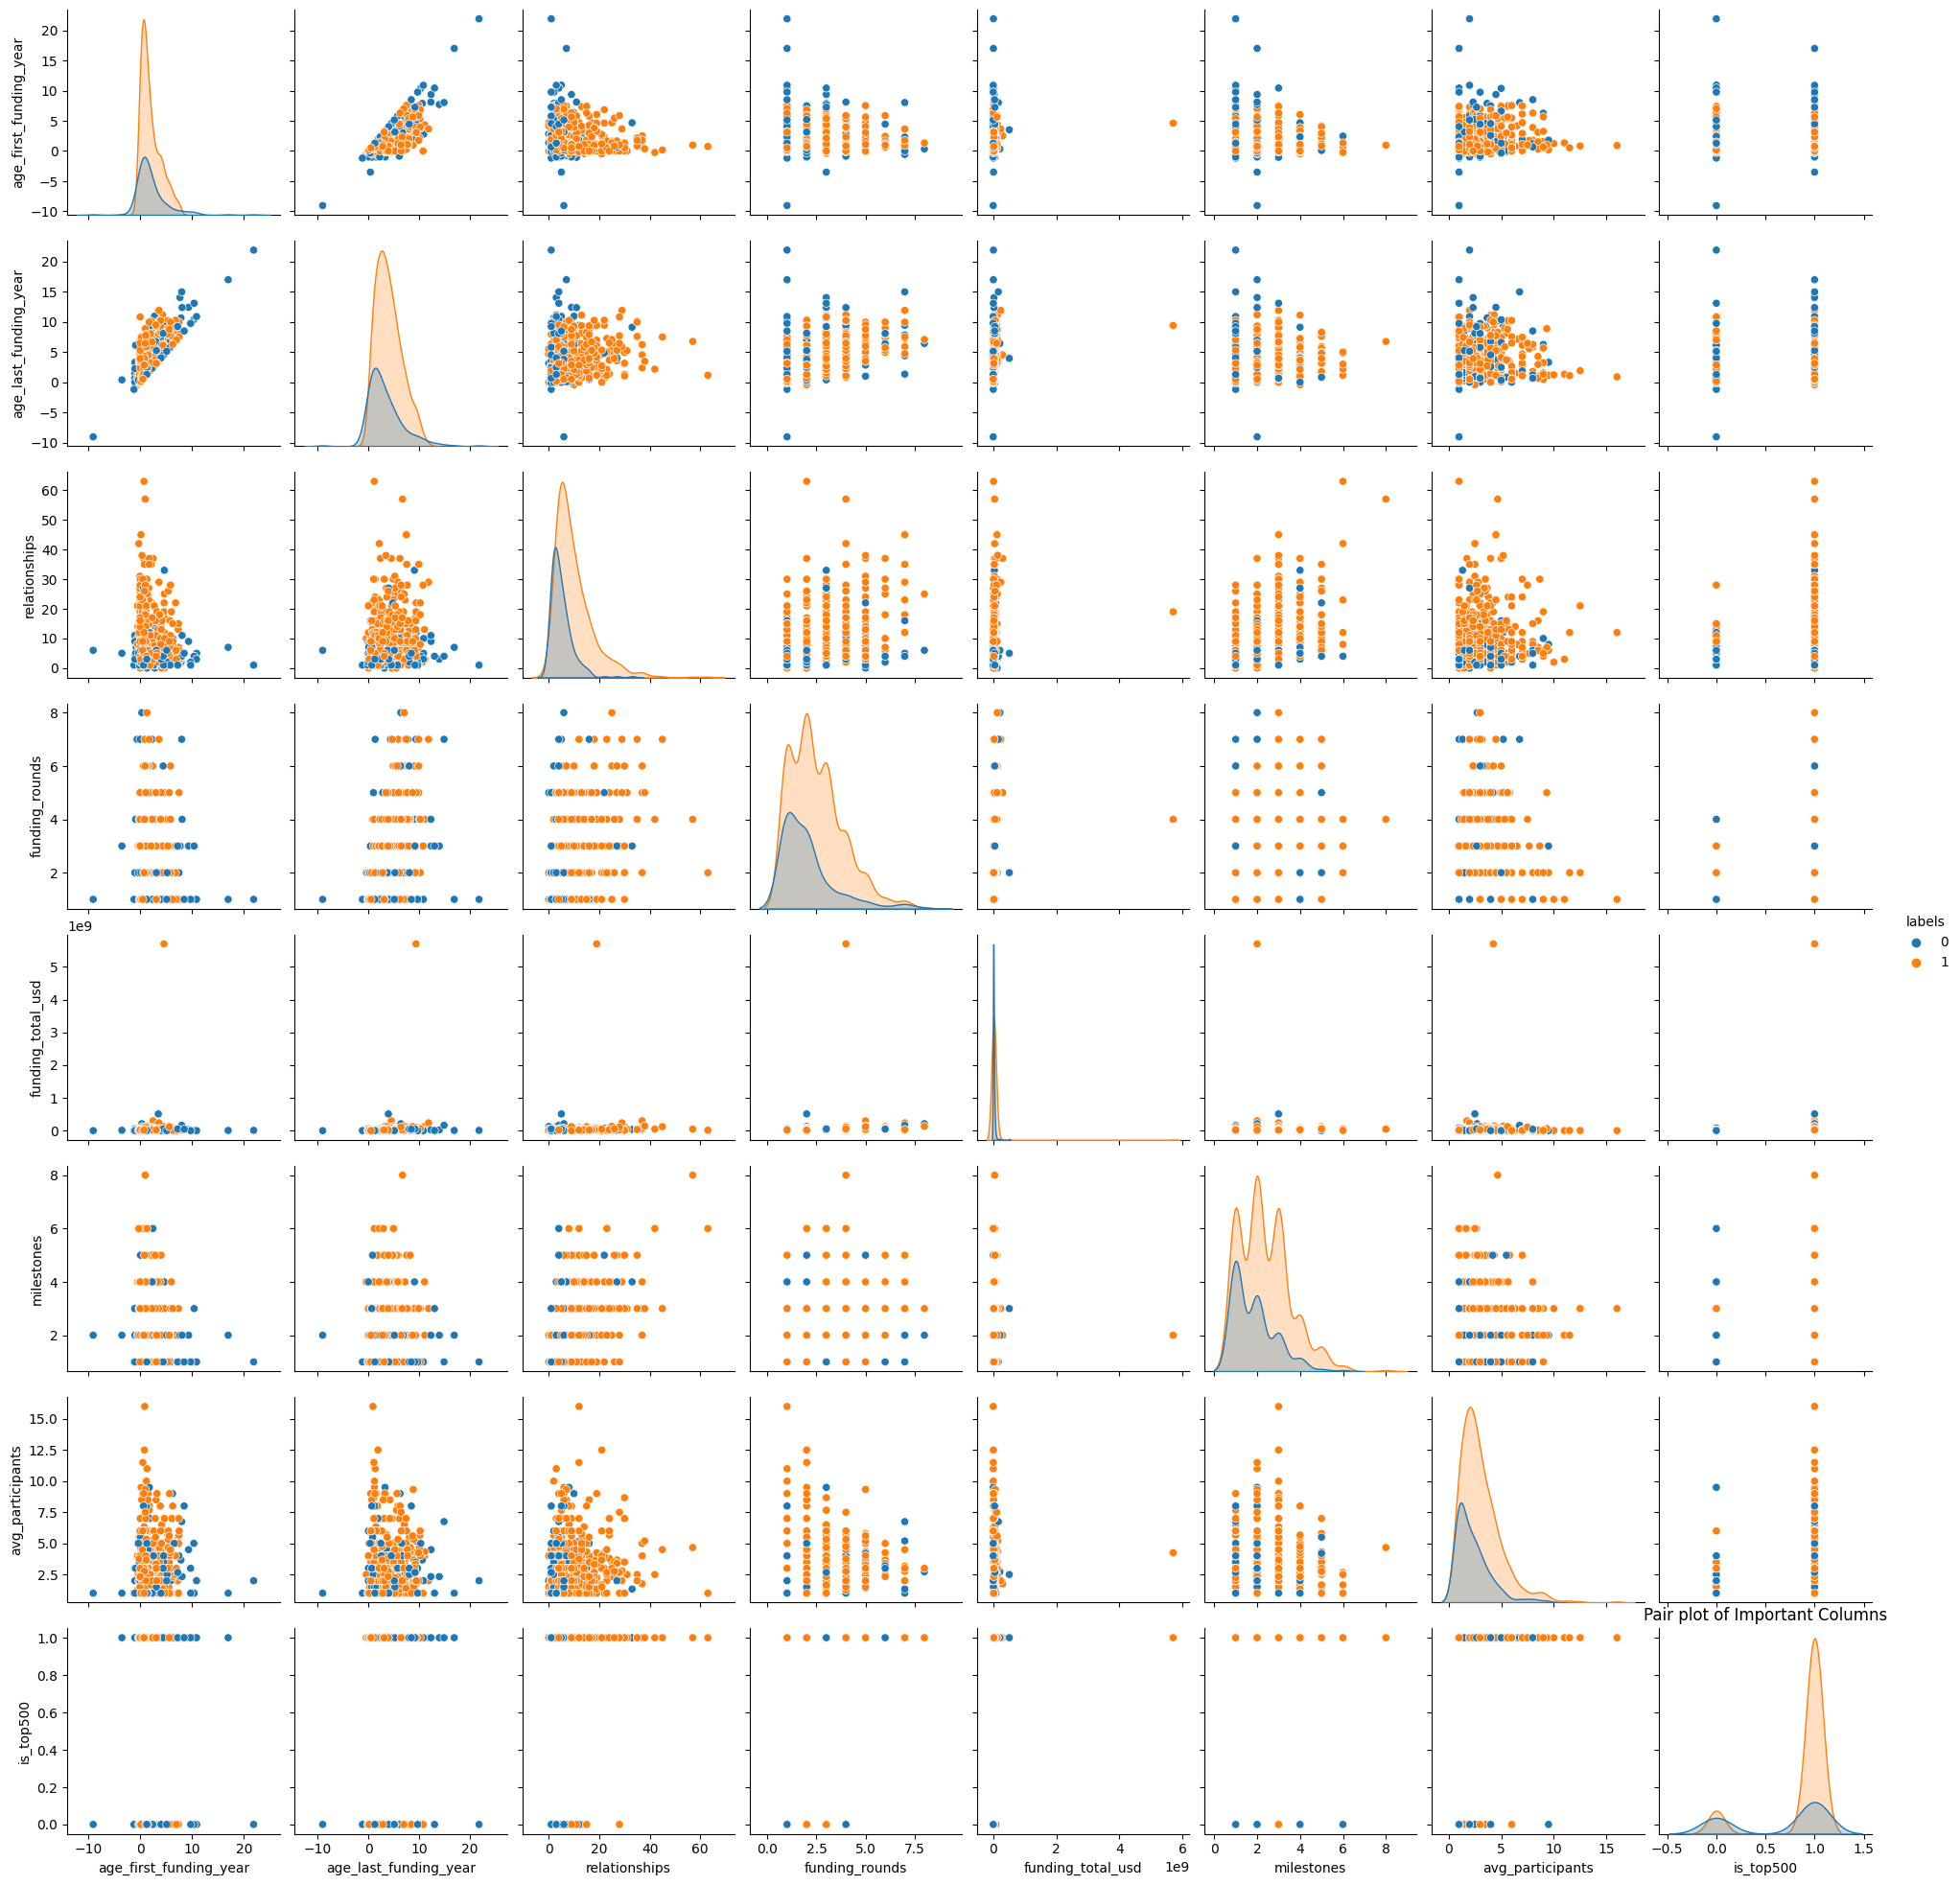

In [ ]:
impcol=[
    'labels','age_first_funding_year','age_last_funding_year','relationships',
    'funding_rounds','funding_total_usd','milestones','avg_participants',
    'is_top500'
]

subset_df=df[impcol]

sns.pairplot(subset_df, hue='labels')
plt.title('Pair plot of Important Columns')
plt.show()

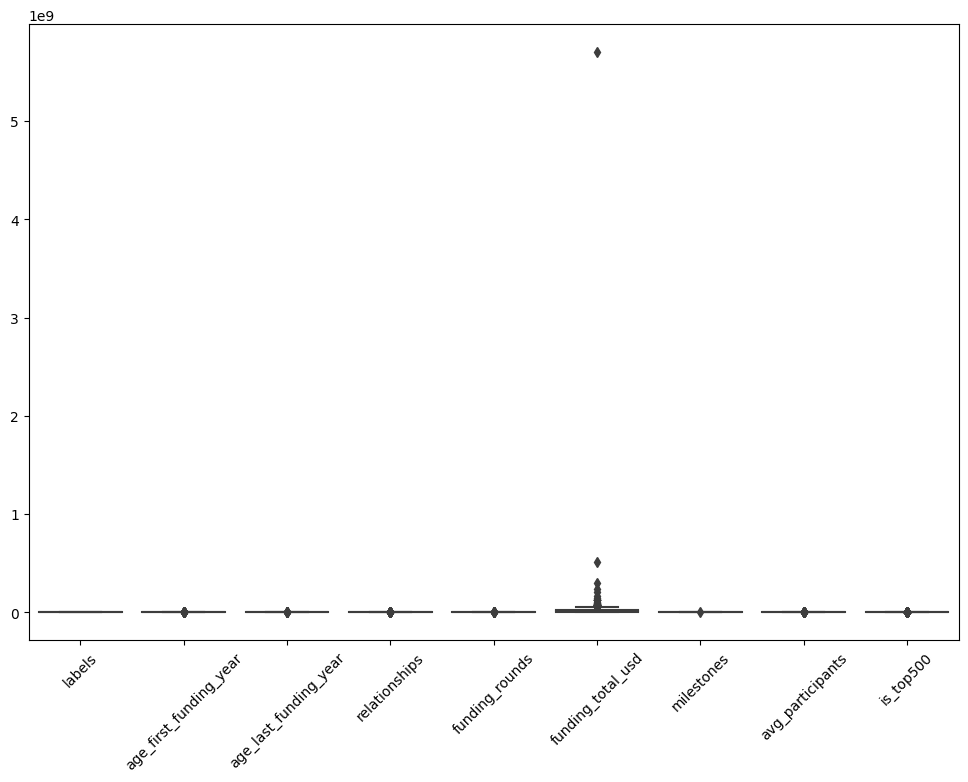

In [ ]:
impcol=[
    'labels','age_first_funding_year','age_last_funding_year','relationships',
    'funding_rounds','funding_total_usd','milestones','avg_participants',
    'is_top500'
]

subset_df=df[impcol]

plt.figure(figsize=(12,8))
sns.boxplot(data=subset_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
cat_cols=['state_code','category_code']
num_cols=['age_first_funding_year', 'age_last_funding_year',
    'age_first_milestone_year', 'age_last_milestone_year',
    'relationships', 'funding_rounds', 'funding_total_usd',
    'milestones', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
    'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

label_encoder=LabelEncoder()
scaler=StandardScaler()

for col in cat_cols:
  df[col]=label_encoder.fit_transform(df[col])

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[('scaler', scaler, num_cols + cat_cols)]
)

In [ ]:
x_scaled = preprocessor.fit_transform(df)

encoded_scaled_column=num_cols + cat_cols

encoded_scaled_df = pd.DataFrame(x_scaled, columns=encoded_scaled_column)
encoded_scaled_df

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,state_code,category_code
0,0.100624,-0.283443,0.541744,0.606695,-0.748932,0.453674,-0.126037,0.698985,-0.677003,1.617103,-1.089725,-0.834287,-0.544331,-0.338123,-0.975894,-2.198484,-0.774222,-0.077312
1,1.353441,2.146463,1.326752,0.700531,0.062148,1.176922,0.065768,-1.059900,1.477098,-0.618390,-1.089725,1.198628,1.837117,2.957505,1.002711,0.454859,-0.774222,-0.969816
2,-0.429124,-0.967747,-0.536844,-0.793868,-0.478572,-0.992823,-0.115294,-0.180457,-0.677003,-0.618390,0.917663,-0.834287,-0.544331,-0.338123,0.606990,0.454859,-0.774222,1.261444
3,0.484827,0.519879,0.989907,0.388326,-0.478572,0.453674,0.065285,-1.059900,-0.677003,-0.618390,-1.089725,1.198628,1.837117,2.957505,0.255221,0.454859,-0.774222,0.904443
4,-0.878956,-0.746941,-1.013525,-1.468558,-0.884112,-0.269574,-0.121571,-1.059900,1.477098,1.617103,-1.089725,-0.834287,-0.544331,-0.338123,-0.975894,0.454859,-0.774222,-0.702065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,-0.653452,-1.146691,-0.831331,-0.071419,0.062148,-0.992823,-0.122536,-0.180457,-0.677003,-0.618390,0.917663,-0.834287,-0.544331,-0.338123,1.662246,0.454859,-0.774222,-1.683819
766,2.279368,1.879002,0.989907,0.388326,-1.019292,0.453674,0.123224,-1.059900,1.477098,-0.618390,-1.089725,1.198628,-0.544331,-0.338123,-0.096496,0.454859,0.207096,0.636692
767,2.821048,1.624881,1.998560,1.323198,-0.478572,-0.992823,0.084598,-1.059900,-0.677003,-0.618390,-1.089725,-0.834287,-0.544331,2.957505,2.717503,0.454859,-0.774222,-1.416068
768,-0.548452,-0.342431,-0.771506,-0.286364,0.467687,-0.269574,-0.053009,-0.180457,-0.677003,-0.618390,0.917663,1.198628,-0.544331,-0.338123,-0.975894,0.454859,-0.774222,0.904443


#Splitting Dataset

In [ ]:
x=encoded_scaled_df
y=df['labels']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Random Forest Classifier

In [ ]:
rf_classifer=RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifer.fit(x_train, y_train)

y_pred=rf_classifer.predict(x_test)

In [ ]:
Accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {Accuracy:.4f}')
print('Classification Report: ')
print(class_rep)

Accuracy: 0.8117
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.45      0.58        44
           1       0.81      0.95      0.88       110

    accuracy                           0.81       154
   macro avg       0.81      0.70      0.73       154
weighted avg       0.81      0.81      0.79       154



#Decision Tree Classifier

In [ ]:
x=encoded_scaled_df
y=df['labels']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
dec_classifier=DecisionTreeClassifier(random_state=42)
dec_classifier.fit(x_train, y_train)

y_pred=dec_classifier.predict(x_test)

accuracy=accuracy_score(y_test, y_pred)
classification_rep=classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report: ')
print(classification_rep)

Accuracy: 0.7013
Classification Report: 
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        44
           1       0.80      0.78      0.79       110

    accuracy                           0.70       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.71      0.70      0.70       154

